<h1>Exploración Inicial de los Datos</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración display y gráficos
pd.set_option('display.max_columns', 100) #Definir limite de columnas a mostrar
sns.set_theme(style="whitegrid") #Estilos para los graficos
plt.rcParams['figure.dpi'] = 110 #Dfinir una calidad estandar para los graficos

In [3]:
# Carga del Dataset Online_realil_II.xlsx
df = pd.read_excel('../data/raw/online_retail_II.xlsx')


Debido a que el dataset es muy grande y esta en una extencion de excel (lo cual es muy lenta para grandes volumenes de datos), la carga y manipulacion de los datos toma un tiempo considerable. Por lo tanto, se sugirere convertir el archivo a un formato mas adecuado, como CSV o Parquet, que permite operaciones mas rápidas, menor uso de memoria y una mejor integración con pandas para el procesamiento posterior.

In [4]:
# Revisión rápida del dataset
print("Shape:", df.shape)
display(df.head())
display(df.dtypes)
display(df.describe(include='all').T)
display(df.info())

Shape: (525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Invoice,525461.0,28816.0,537434.0,675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,525461,4632,85123A,3516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,522533,4681,WHITE HANGING HEART T-LIGHT HOLDER,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,525461.0,NaN,NaN,NaN,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,NaN,NaN,NaN,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,NaN,NaN,NaN,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,NaN,NaN,NaN,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316
Country,525461,40,United Kingdom,485852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


None

### Resultados de la Revision rápida del dataset

El Dataset "online_retail_II" originalmente contiene un total de 525.461 registros y 8 columnas.

Los registros corresponden a transacciones de ventas realizadas por una tienda online de productos entre diciembre de 2009 y diciembre de 2010.

En la inspeccion inicial del dataset, se observa que multples columnas presentan tipos de datos incorrectos o que no son adecuacuados para la variable, particularmente las columnas clasificadas como "object", ya que este tipo de dato es muy general y puede incluir tanto texto como números.

A su vez, se indentifican columnas con valores nulos, como "Customer ID" lo que indica porque su tipo es "float64" en lugar de "int64". 

Se detectan tambien valores negativos en la columna "Quantity", lo que sugiere la presencia de devoluciones o cancelaciones de pedidos, lo que requiere una limpieza y preprocesamiento adicional antes de proceder con el análisis, ya que estos valores no son necesacios para el objetivo del proyecto que es el cálculo del CLTV.

Se obverva tambien la fuerte presencia de valores atipicos en el dataset, especialmente en las columnas "Quantity" y "Price", ya que el std es considerablemente alto en comparación con la media, lo que indica una alta variabilidad en los datos.

Finalmente, la columna invoice solo tiene 28.816 valores unicos lo que podria indicar que cada registro del dataset no es una transaccion individual, sino que varios registros pueden estar asociados a una misma factura, es decir la compra de multiples productos en una sola transaccion, contiene multiples registros en el dataset.

In [ ]:
print(f"Cantidades <= 0: {(df['Quantity'] <= 0).sum()}")
print(f"Precios <= 0: {(df['Price'] <= 0).sum()}")

Cantidades <= 0: 12326
Precios <= 0: 3690


se encuentran registros menores o iguales a 0 en las columnas "Quantity" y "Price", lo que puede indicar devoluciones, cancelaciones o errores en la entrada de datos, lo que requiere un tratamiendo para este tipo de registros ya que no son necesarios para el analisis del CLTV.

In [38]:
df.isnull().sum()

Invoice              0
StockCode            0
Description       2928
Quantity             0
InvoiceDate          0
Price                0
Customer ID     107927
Country              0
Quantity_log      7613
dtype: int64

Se observa la presencia de valores nulos en las columnas "Customer ID" y "Description", lo que sugiere una revision y limpieza adicional de los datos antes de proceder con el análisis.

In [39]:
df.duplicated().sum()

np.int64(6865)

Existen 6.865 valores duplicados en el dataset, los valores se revisaran y se eliminaran en caso de ser duplicados reales.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       525461 non-null  object        
 1   StockCode     525461 non-null  object        
 2   Description   522533 non-null  object        
 3   Quantity      525461 non-null  int64         
 4   InvoiceDate   525461 non-null  datetime64[ns]
 5   Price         525461 non-null  float64       
 6   Customer ID   417534 non-null  float64       
 7   Country       525461 non-null  object        
 8   Quantity_log  517848 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.1+ MB


<h4>Grafica de variables numericas(Quantity, Price) contables con potenciales Outliers</h4>

d:\anaconda3\envs\cltv_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda3\envs\cltv_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


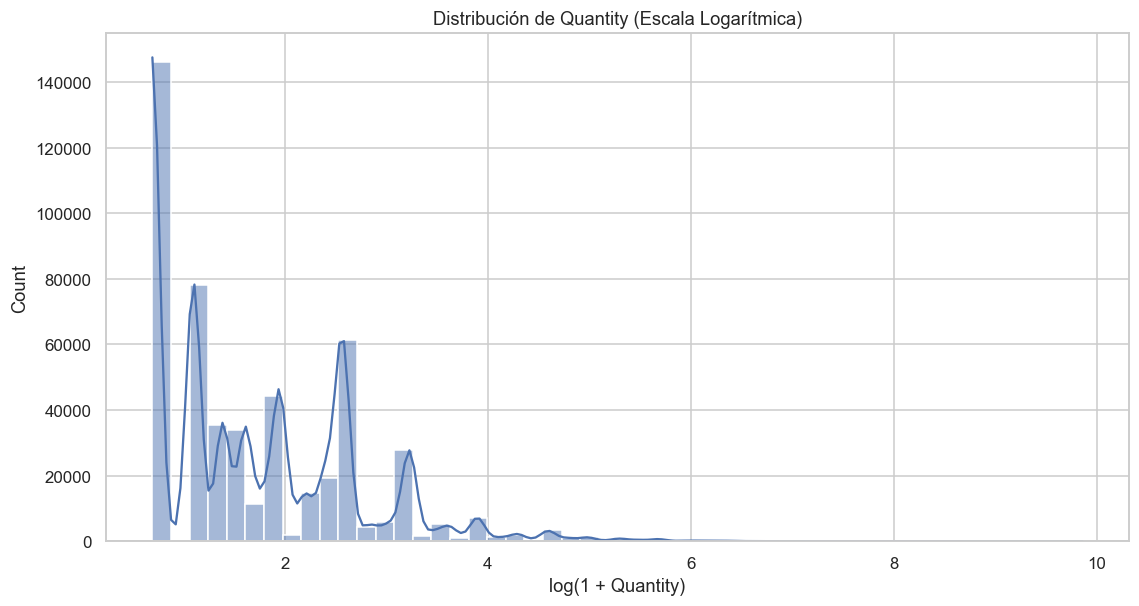

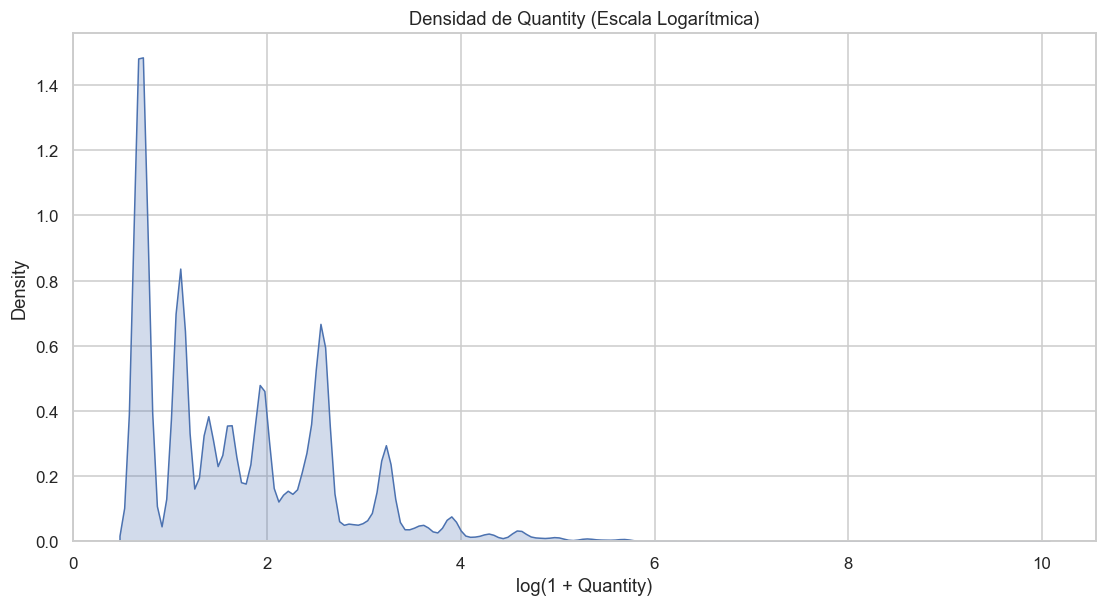

In [41]:
# Nota: Aplica log solo a valores positivos. Si hay 0 o negativos, ajusta la transformación
# np.log1p(x) calcula log(1+x), que es bueno para valores cercanos a 0.
df['Quantity_log'] = np.log1p(df['Quantity'])

plt.figure(figsize=(12, 6))

# 1. Histograma para ver la forma de la distribución principal
sns.histplot(df['Quantity_log'], bins=50, kde=True)
plt.title('Distribución de Quantity (Escala Logarítmica)')
plt.xlabel('log(1 + Quantity)')
plt.show()

# Opcionalmente, un gráfico de densidad (KDE) para suavizar la distribución
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Quantity_log'], fill=True)
plt.title('Densidad de Quantity (Escala Logarítmica)')
plt.xlabel('log(1 + Quantity)')
plt.show()

<h4>Grafica de variables numericas(Quantity, Price), para verificar la media </h4>

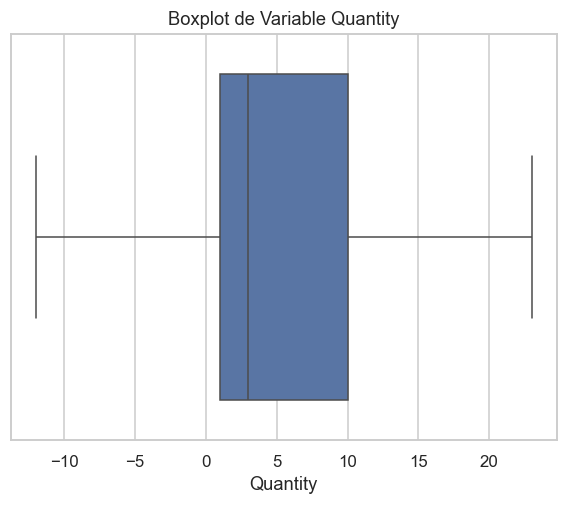

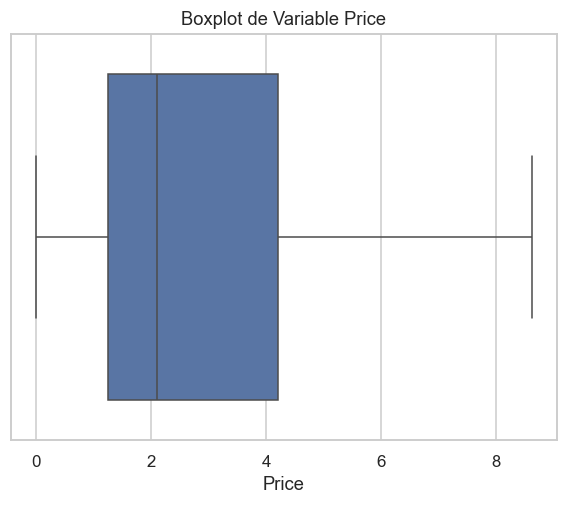

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Boxplot de Variable Quantity')
sns.boxplot(x=df['Quantity'], showfliers=False)
plt.show()

plt.title('Boxplot de Variable Price')
sns.boxplot(x=df['Price'], showfliers=False)
plt.show()

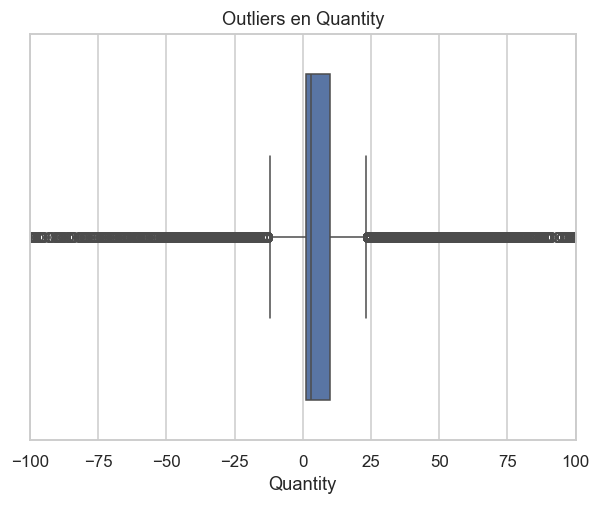

In [78]:
plt.title('Outliers en Quantity')
sns.boxplot(x=df['Quantity'])
plt.xlim(-100, 100)
plt.show()

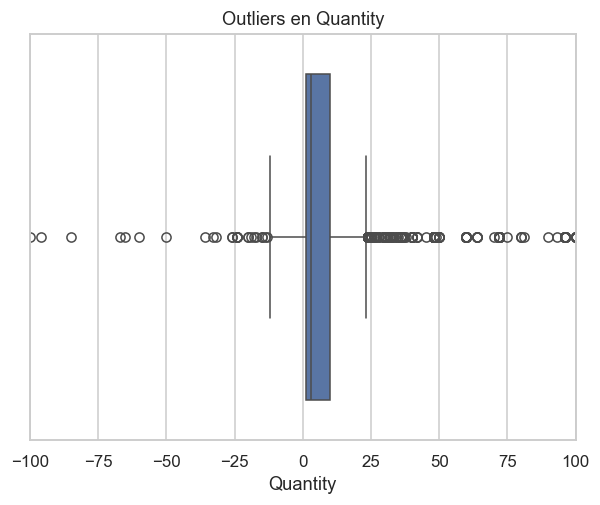

In [79]:
plt.title('Outliers en Quantity')
sns.boxplot(x=df['Quantity'].sample(10000, random_state=42))
plt.xlim(-100, 100)
plt.show()

<Axes: xlabel='Quantity', ylabel='Density'>

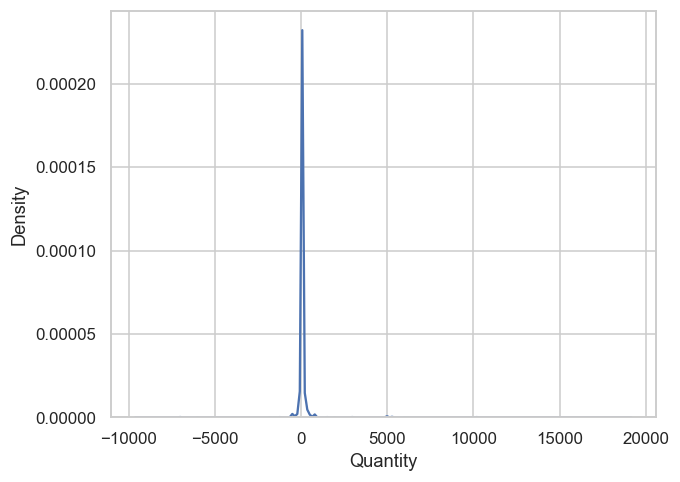

In [91]:
sns.kdeplot(df['Quantity'], bw_adjust=0.5)


<Axes: xlabel='Quantity', ylabel='Price'>

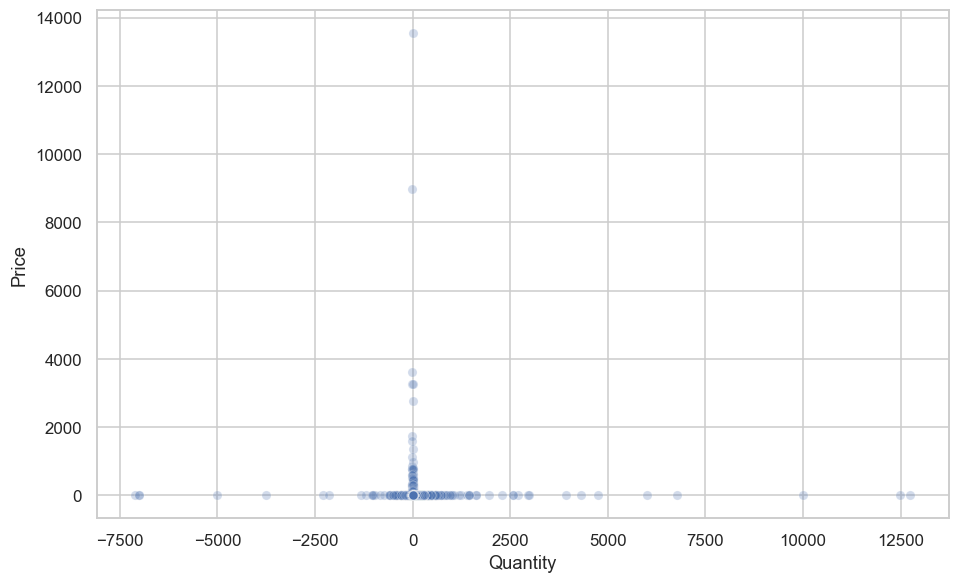

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(50000),
    x="Quantity", y="Price",
    alpha=0.25,
)


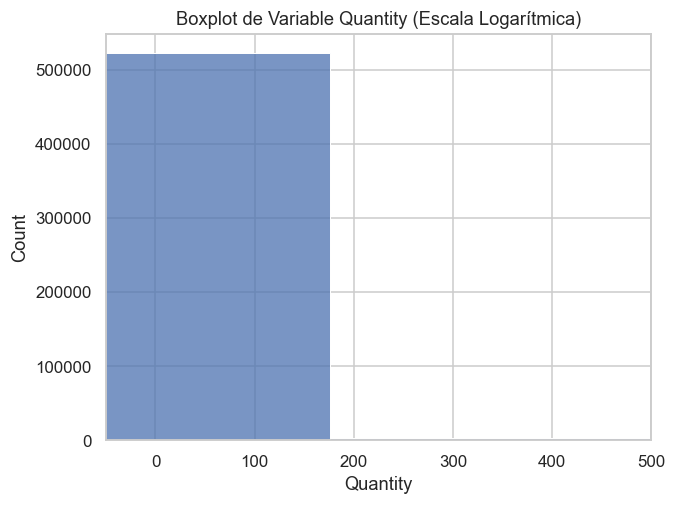

In [87]:
plt.title('Boxplot de Variable Quantity (Escala Logarítmica)')
sns.histplot(df['Quantity'], bins=50)
plt.xlim(-50, 500)
plt.show()

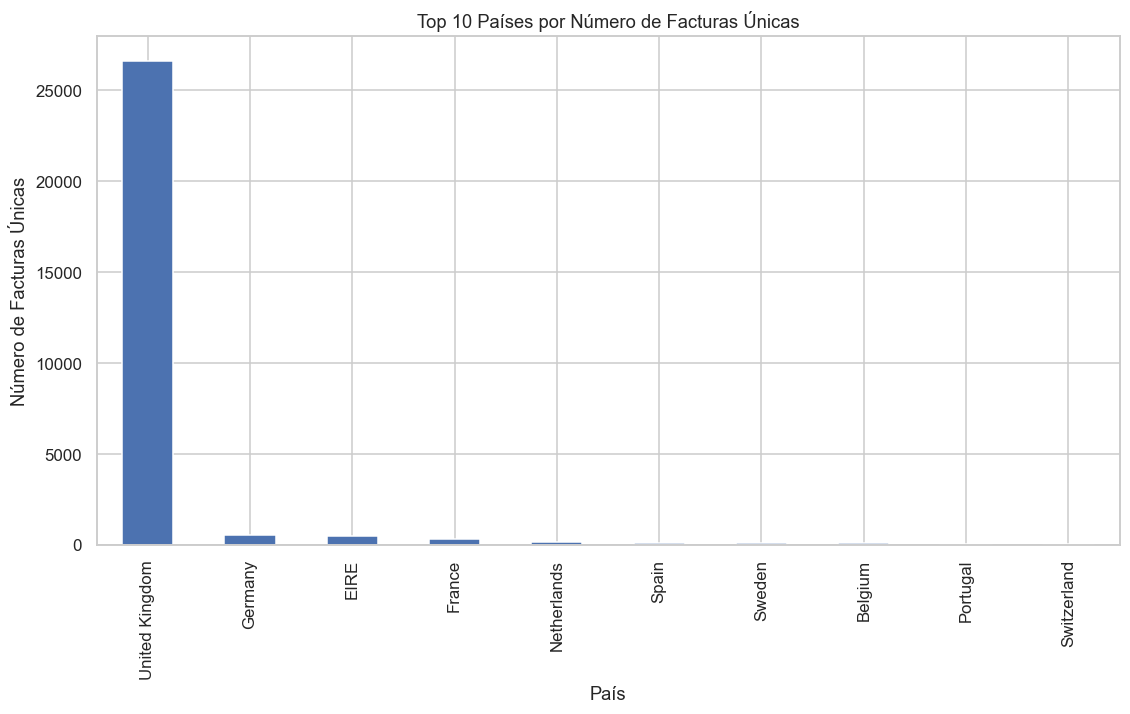

In [88]:
top_10_paises = (df.groupby('Country')['Invoice']
                 .nunique()
                 .sort_values(ascending=False)
                 .head(10))

plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar')
plt.title('Top 10 Países por Número de Facturas Únicas')
plt.xlabel('País')
plt.ylabel('Número de Facturas Únicas')
plt.show()

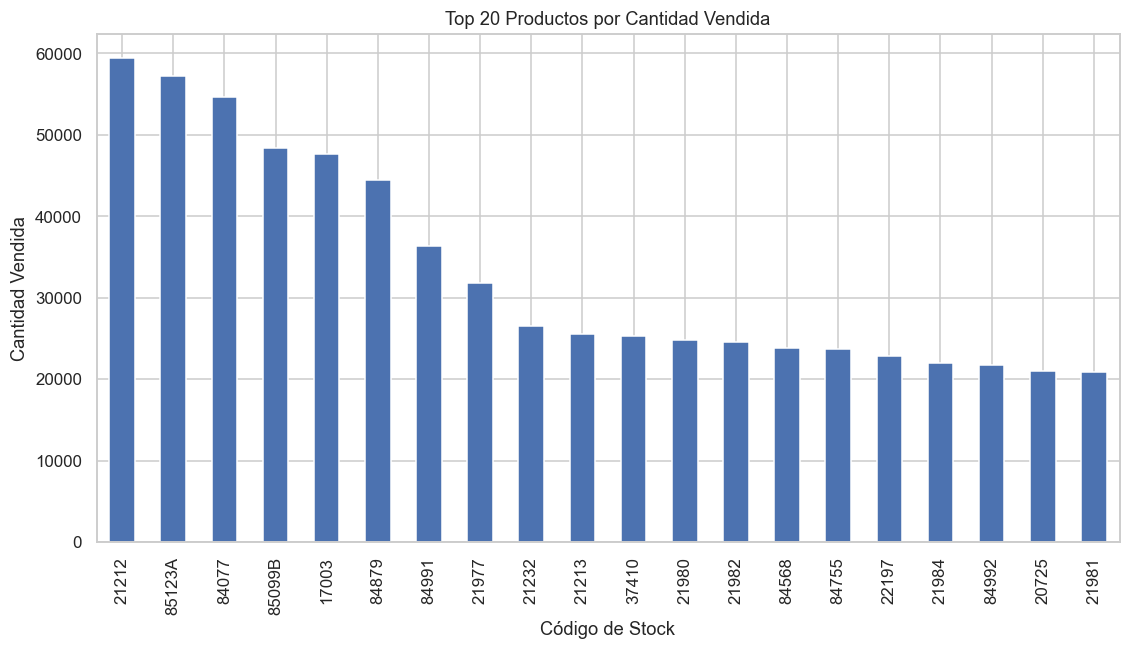

In [89]:
top_20_productos = (df.groupby('StockCode')['Quantity']
                    .sum()
                    .sort_values(ascending=False)
                    .head(20))

plt.figure(figsize=(12, 6))
top_20_productos.plot(kind='bar')
plt.title('Top 20 Productos por Cantidad Vendida')
plt.xlabel('Código de Stock')
plt.ylabel('Cantidad Vendida')
plt.show()

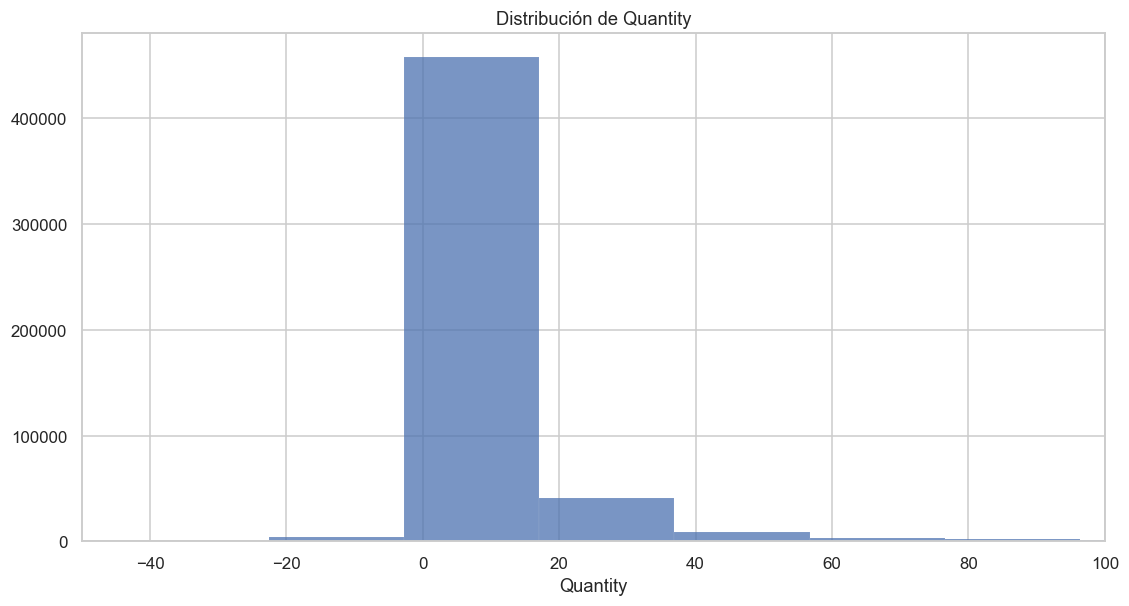

In [90]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Quantity'])
plt.xlim(-50,100)
plt.title('Distribución de Quantity')
plt.xlabel('Quantity')
plt.ylabel('')
plt.show()